## About the Competition

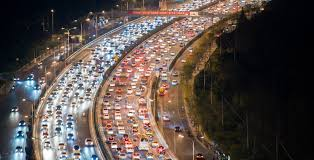


The dataset for this competition includes aggregate stopped vehicle information and intersection wait times. Your task is to predict congestion, based on an aggregate measure of stopping distance and waiting times, at intersections in 4 major US cities: Atlanta, Boston, Chicago & Philadelphia.

**Key Take Aways**

 Exploratory Data Analysis
 
 Extensive Modelling

**Necessary Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
pd.set_option('max_columns',None)

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Reading the Files**

In [4]:
train_df=pd.read_csv("../input/train.csv")
test_df=pd.read_csv("../input/test.csv")

## Exploratory Data Analysis

**Understanding the nature of data**

In [5]:
train_df.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p40,TotalTimeStopped_p50,TotalTimeStopped_p60,TotalTimeStopped_p80,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1920335,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1920336,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1920337,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1920338,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1920339,0,33.79166,-84.43003,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [6]:
train_df.isnull().sum()

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8189
ExitStreetName             5534
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

In [7]:
#Finding the columns whether they are categorical or numerical
cols = train_df.columns
num_cols = train_df._get_numeric_data().columns
print("Numerical Columns",num_cols)
cat_cols=list(set(cols) - set(num_cols))
print("Categorical Columns:",cat_cols)

Numerical Columns Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'Hour', 'Weekend',
       'Month', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80'],
      dtype='object')
Categorical Columns: ['Path', 'EntryStreetName', 'ExitStreetName', 'ExitHeading', 'City', 'EntryHeading']


丢弃nan值

In [8]:
train=train_df
train_df=train_df.dropna()

**Let's start getting insights**

Let's understand nature of the data citywise

In [9]:
train_df.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [10]:
Atlanda=train_df[train_df['City']=='Atlanta']
Boston=train_df[train_df['City']=='Boston']
Chicago=train_df[train_df['City']=='Chicago']
Philadelphia=train_df[train_df['City']=='Philadelphia']


**City's Area's with more waitage time's**

In [11]:
Atlanda['TotalTimeWaited']=Atlanda['TotalTimeStopped_p20']+Atlanda['TotalTimeStopped_p40']+Atlanda['TotalTimeStopped_p50']+Atlanda['TotalTimeStopped_p60']+Atlanda['TotalTimeStopped_p80']
Boston['TotalTimeWaited']=Boston['TotalTimeStopped_p20']+Boston['TotalTimeStopped_p40']+Boston['TotalTimeStopped_p50']+Boston['TotalTimeStopped_p60']+Boston['TotalTimeStopped_p80']
Chicago['TotalTimeWaited']=Chicago['TotalTimeStopped_p20']+Chicago['TotalTimeStopped_p40']+Chicago['TotalTimeStopped_p50']+Chicago['TotalTimeStopped_p60']+Chicago['TotalTimeStopped_p80']
Philadelphia['TotalTimeWaited']=Philadelphia['TotalTimeStopped_p20']+Philadelphia['TotalTimeStopped_p40']+Philadelphia['TotalTimeStopped_p50']+Philadelphia['TotalTimeStopped_p60']+Philadelphia['TotalTimeStopped_p80']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

**Highest Traffic Starting street**

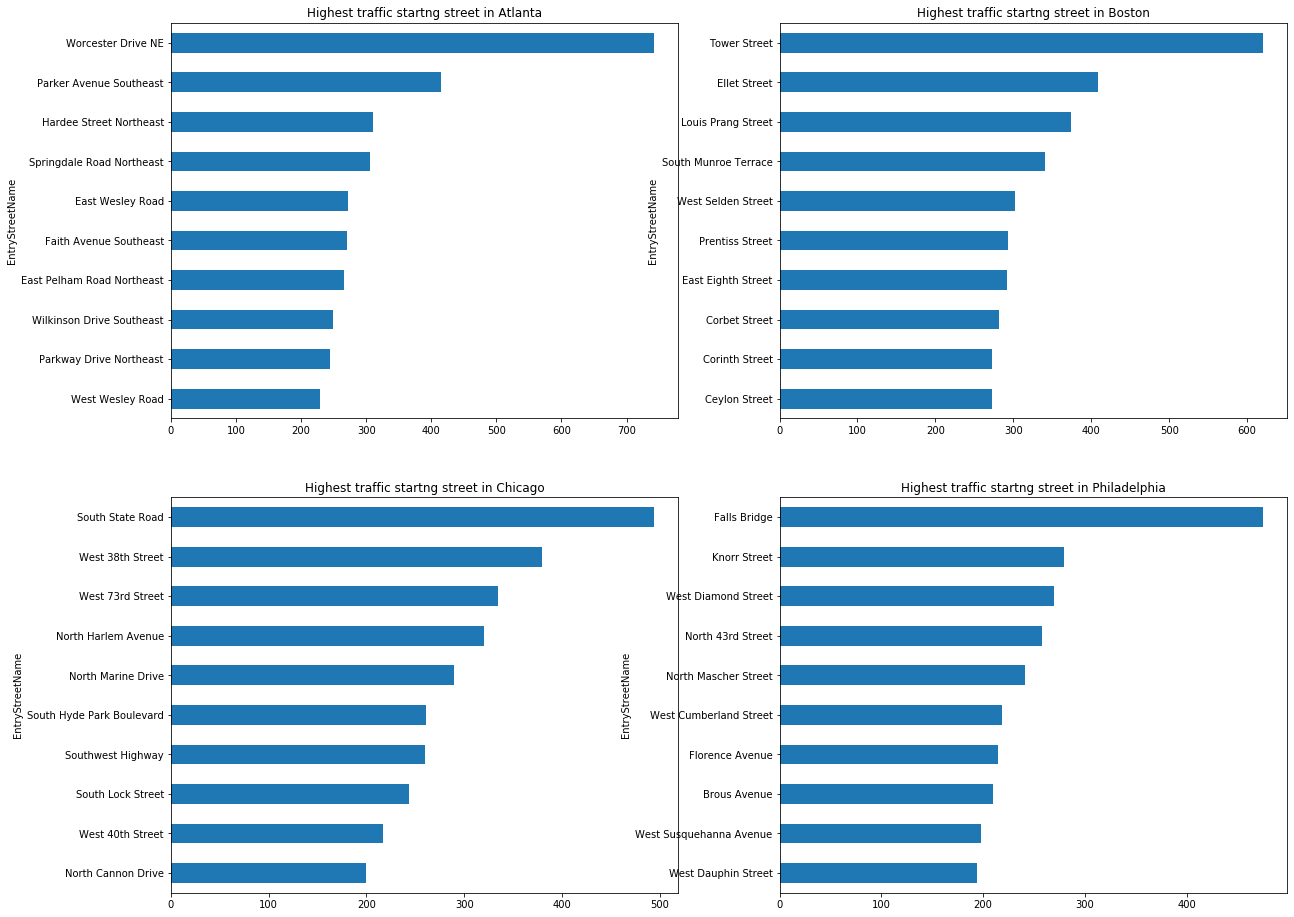

<Figure size 1440x1152 with 0 Axes>

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20,16))
temp_1=Atlanda.groupby('EntryStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_1.plot(kind='barh',ax=axes[0,0],figsize=(20,16),title='Highest traffic startng street in Atlanta')

temp_2=Boston.groupby('EntryStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_2.plot(kind='barh',ax=axes[0,1],figsize=(20,16),title='Highest traffic startng street in Boston')

temp_3=Chicago.groupby('EntryStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_3.plot(kind='barh',ax=axes[1,0],figsize=(20,16),title='Highest traffic startng street in Chicago')

temp_4=Philadelphia.groupby('EntryStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_4.plot(kind='barh',ax=axes[1,1],figsize=(20,16),title='Highest traffic startng street in Philadelphia')


**Highest Traffic ending street**

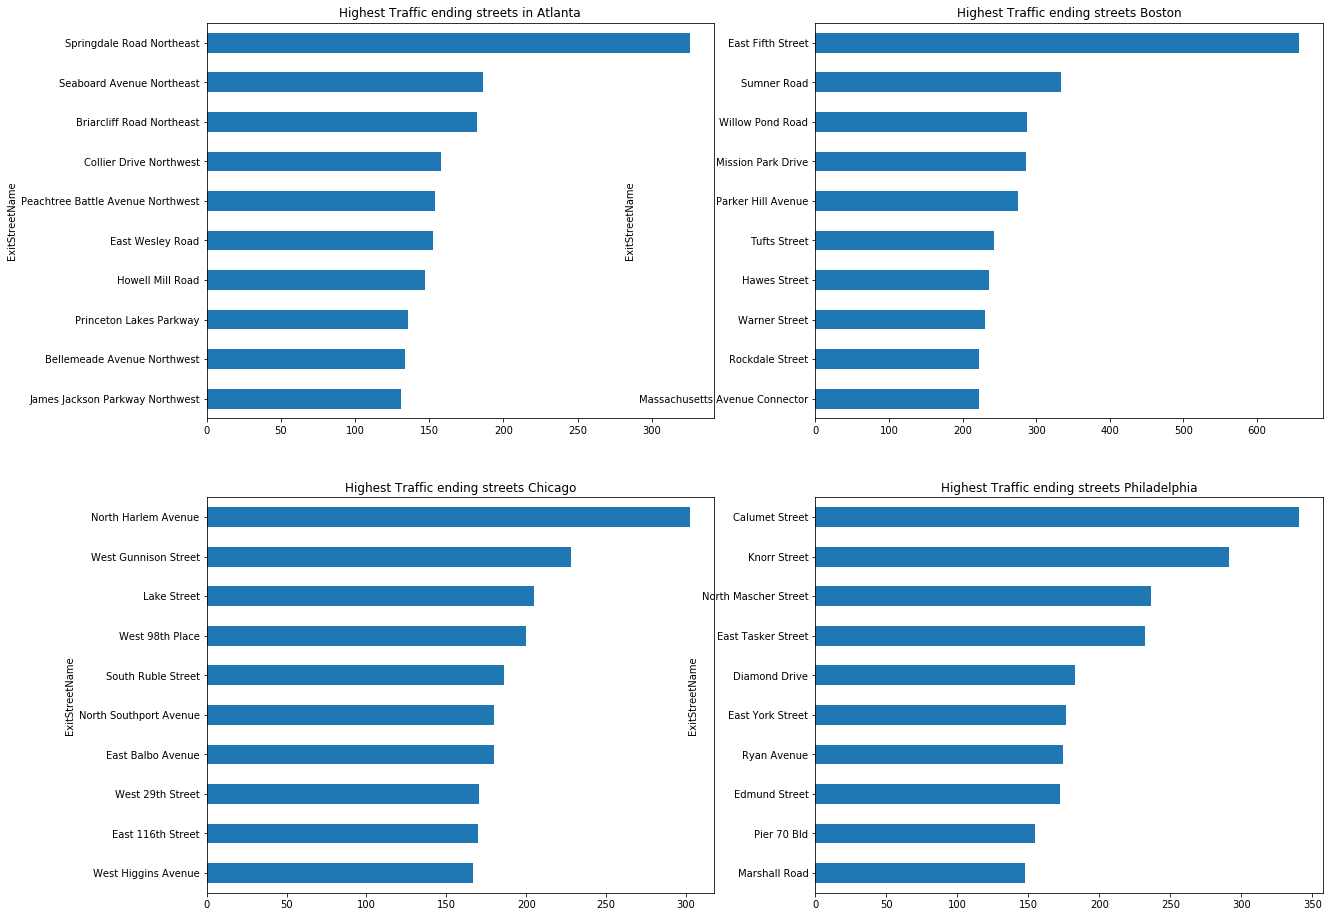

<Figure size 1440x1152 with 0 Axes>

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20,16))
temp_1=Atlanda.groupby('ExitStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_1.plot(kind='barh',ax=axes[0,0],figsize=(20,16),title='Highest Traffic ending streets in Atlanta')

temp_2=Boston.groupby('ExitStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_2.plot(kind='barh',ax=axes[0,1],figsize=(20,16),title='Highest Traffic ending streets Boston')

temp_3=Chicago.groupby('ExitStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_3.plot(kind='barh',ax=axes[1,0],figsize=(20,16),title='Highest Traffic ending streets Chicago')

temp_4=Philadelphia.groupby('ExitStreetName')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_4.plot(kind='barh',ax=axes[1,1],figsize=(20,16),title='Highest Traffic ending streets Philadelphia')

**Most Traffic Path**

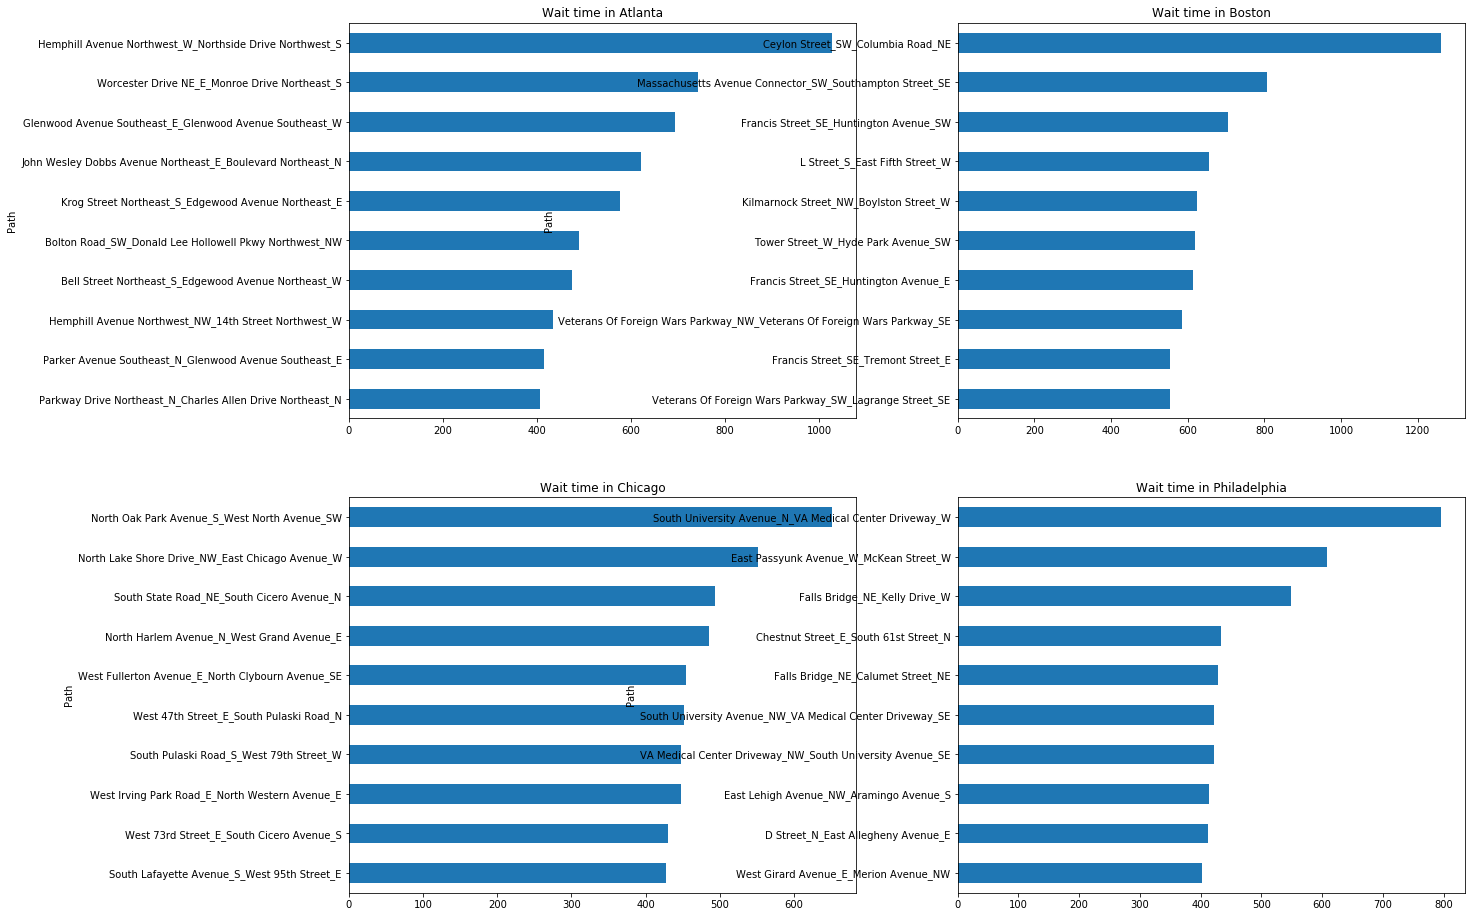

<Figure size 1440x1152 with 0 Axes>

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig = plt.figure(figsize=(20,16))
temp_1=Atlanda.groupby('Path')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_1.plot(kind='barh',ax=axes[0,0],figsize=(20,16),title='Wait time in Atlanta')

temp_2=Boston.groupby('Path')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_2.plot(kind='barh',ax=axes[0,1],figsize=(20,16),title='Wait time in Boston')

temp_3=Chicago.groupby('Path')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_3.plot(kind='barh',ax=axes[1,0],figsize=(20,16),title='Wait time in Chicago')

temp_4=Philadelphia.groupby('Path')['TotalTimeWaited'].mean().sort_values().tail(10)
temp_4.plot(kind='barh',ax=axes[1,1],figsize=(20,16),title='Wait time in Philadelphia')

**Waitage time hour wise pattern**

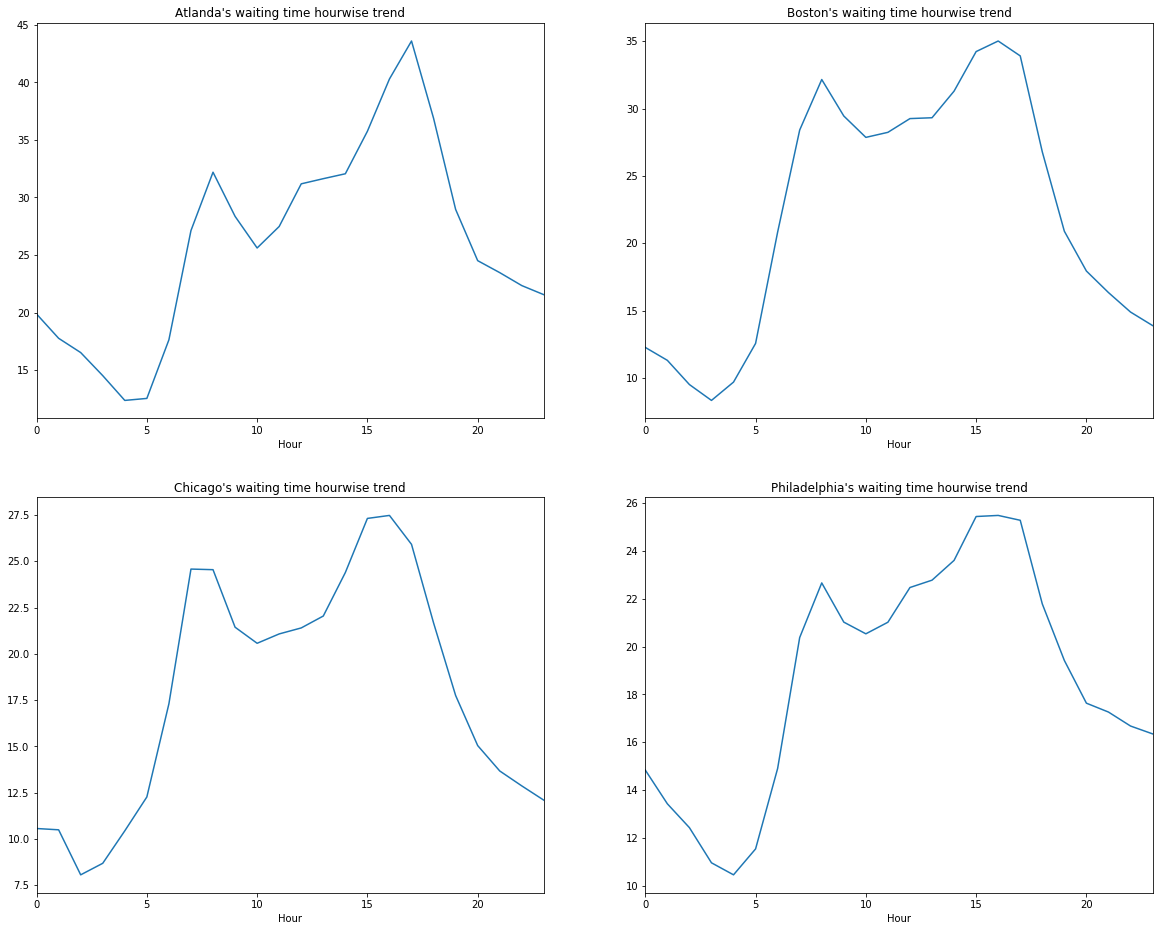

In [15]:
fig , axes = plt.subplots(nrows=2, ncols=2)


A_hr=Atlanda.groupby('Hour')['TotalTimeStopped_p80'].mean()
A_hr.plot(ax=axes[0,0],title="Atlanda's waiting time hourwise trend",figsize=(20,16))


B_hr=Boston.groupby('Hour')['TotalTimeStopped_p80'].mean()
B_hr.plot(ax=axes[0,1],title="Boston's waiting time hourwise trend",figsize=(20,16))


C_hr=Chicago.groupby('Hour')['TotalTimeStopped_p80'].mean()
C_hr.plot(ax=axes[1,0],title="Chicago's waiting time hourwise trend",figsize=(20,16))


P_hr=Philadelphia.groupby('Hour')['TotalTimeStopped_p80'].mean()
P_hr.plot(ax=axes[1,1],title="Philadelphia's waiting time hourwise trend",figsize=(20,16))


**Weekend vs WeekDays Trend**

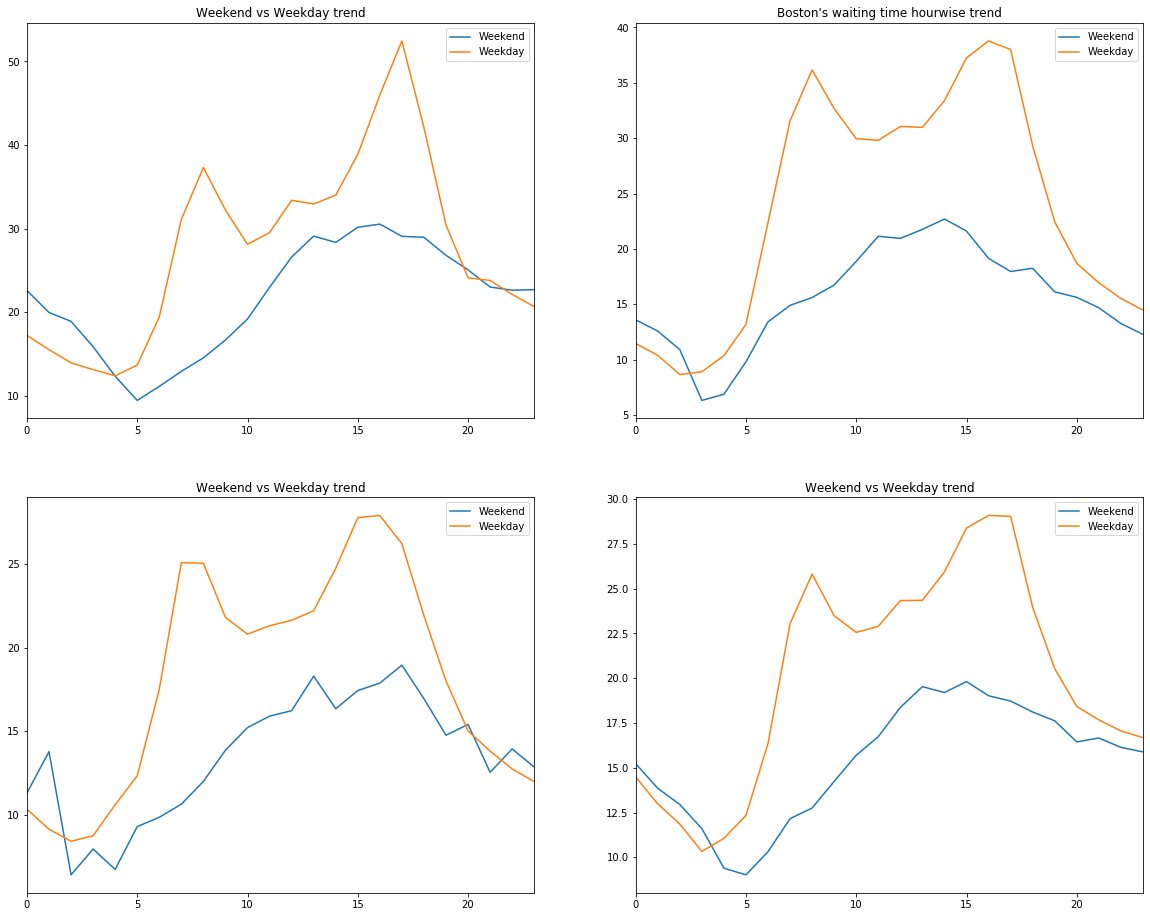

In [16]:
fig , axes = plt.subplots(nrows=2, ncols=2)

A_hr=pd.DataFrame(index=Atlanda.Hour.unique())
A_hr['Weekend']=Atlanda[Atlanda['Weekend']==1].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
A_hr['Weekday']=Atlanda[Atlanda['Weekend']==0].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
A_hr=A_hr.sort_index()
A_hr.plot(ax=axes[0,0],title="Weekend vs Weekday trend",figsize=(20,16))


B_hr=pd.DataFrame(index=Boston.Hour.unique())
B_hr['Weekend']=Boston[Boston['Weekend']==1].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
B_hr['Weekday']=Boston[Boston['Weekend']==0].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
B_hr=B_hr.sort_index()
B_hr.plot(ax=axes[0,1],title="Boston's waiting time hourwise trend",figsize=(20,16))


C_hr=pd.DataFrame(index=Chicago.Hour.unique())
C_hr['Weekend']=Chicago[Chicago['Weekend']==1].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
C_hr['Weekday']=Chicago[Chicago['Weekend']==0].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
C_hr=C_hr.sort_index()
C_hr.plot(ax=axes[1,0],title="Weekend vs Weekday trend",figsize=(20,16))


P_hr=pd.DataFrame(index=Atlanda.Hour.unique())
P_hr['Weekend']=Philadelphia[Philadelphia['Weekend']==1].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
P_hr['Weekday']=Philadelphia[Philadelphia['Weekend']==0].groupby(['Hour'])['TotalTimeStopped_p80'].mean()
P_hr=P_hr.sort_index()
P_hr.plot(ax=axes[1,1],title="Weekend vs Weekday trend",figsize=(20,16))

**More Traffic Area's Geospatial plot**

In [17]:
trafficdf=Atlanda.groupby(['Latitude','Longitude'])['TotalTimeStopped_p20'].count()
trafficdf=trafficdf.to_frame()
trafficdf.columns.values[0]='count1'
trafficdf=trafficdf.reset_index()
lats=trafficdf[['Latitude','Longitude','count1']].values.tolist()
    
hmap = folium.Map(location=[min(Atlanda['Latitude']),min(Atlanda['Longitude'])], zoom_start=10, )
hmap.add_child(HeatMap(lats, radius = 5))
hmap


**Chicago's More Trafficed area**

In [18]:
trafficdf=Chicago.groupby(['Latitude','Longitude'])['TotalTimeStopped_p60'].count()
trafficdf=trafficdf.to_frame()
trafficdf.columns.values[0]='count1'
trafficdf=trafficdf.reset_index()
lats=trafficdf[['Latitude','Longitude','count1']].values.tolist()
    
hmap = folium.Map(location=[min(Chicago['Latitude']),min(Chicago['Longitude'])], zoom_start=9, )
hmap.add_child(HeatMap(lats, radius = 5))
hmap

**Boston's More Traffied Area**

In [19]:
trafficdf=Boston.groupby(['Latitude','Longitude'])['TotalTimeStopped_p60'].count()
trafficdf=trafficdf.to_frame()
trafficdf.columns.values[0]='count1'
trafficdf=trafficdf.reset_index()
lats=trafficdf[['Latitude','Longitude','count1']].values.tolist()
    
hmap = folium.Map(location=[min(Boston['Latitude']),min(Boston['Longitude'])], zoom_start=10.5, )
hmap.add_child(HeatMap(lats, radius = 5))
hmap

**Philadelphia's More Trafficed Area's**

In [20]:
trafficdf=Philadelphia.groupby(['Latitude','Longitude'])['TotalTimeStopped_p60'].count()
trafficdf=trafficdf.to_frame()
trafficdf.columns.values[0]='count1'
trafficdf=trafficdf.reset_index()
lats=trafficdf[['Latitude','Longitude','count1']].values.tolist()
    
hmap = folium.Map(location=[min(Philadelphia['Latitude']),min(Philadelphia['Longitude'])], zoom_start=10, )
hmap.add_child(HeatMap(lats, radius = 5))
hmap

## Feature Engineering

In [21]:
train['EntryHeading']

0         NW
1         SE
2         NW
3         SE
4         NW
          ..
857404     S
857405     W
857406     S
857407     S
857408     S
Name: EntryHeading, Length: 857409, dtype: object

In [22]:
#Creating Dummies for train Data 创建进入方向和离开方向
dfen = pd.get_dummies(train["EntryHeading"],prefix = 'en')
dfex = pd.get_dummies(train["ExitHeading"],prefix = 'ex')
train = pd.concat([train,dfen],axis=1)
train = pd.concat([train,dfex],axis=1)

#Creating Dummies for test Data
dfent = pd.get_dummies(test_df["EntryHeading"],prefix = 'en')
dfext = pd.get_dummies(test_df["ExitHeading"],prefix = 'ex')
test_df = pd.concat([test_df,dfent],axis=1)
test_df = pd.concat([test_df,dfext],axis=1)



     RowId  IntersectionId  Latitude  Longitude               EntryStreetName  \
0  1920335               0  33.79166  -84.43003  Marietta Boulevard Northwest   
1  1920336               0  33.79166  -84.43003  Marietta Boulevard Northwest   
2  1920337               0  33.79166  -84.43003  Marietta Boulevard Northwest   
3  1920338               0  33.79166  -84.43003  Marietta Boulevard Northwest   
4  1920339               0  33.79166  -84.43003  Marietta Boulevard Northwest   

                 ExitStreetName EntryHeading ExitHeading  Hour  Weekend  \
0  Marietta Boulevard Northwest           NW          NW     0        0   
1  Marietta Boulevard Northwest           SE          SE     0        0   
2  Marietta Boulevard Northwest           NW          NW     1        0   
3  Marietta Boulevard Northwest           SE          SE     1        0   
4  Marietta Boulevard Northwest           NW          NW     2        0   

   Month                                               Path  \

In [23]:
#Training Data
X = train[["IntersectionId","Hour","Weekend","Month",'en_E',
       'en_N', 'en_NE', 'en_NW', 'en_S', 'en_SE', 'en_SW', 'en_W', 'ex_E',
       'ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]
y1 = train["TotalTimeStopped_p20"]
y2 = train["TotalTimeStopped_p50"]
y3 = train["TotalTimeStopped_p80"]
y4 = train["DistanceToFirstStop_p20"]
y5 = train["DistanceToFirstStop_p50"]
y6 = train["DistanceToFirstStop_p80"]

In [24]:
testX = test_df[["IntersectionId","Hour","Weekend","Month",'en_E','en_N', 'en_NE', 'en_NW', 'en_S', 
              'en_SE', 'en_SW', 'en_W', 'ex_E','ex_N', 'ex_NE', 'ex_NW', 'ex_S', 'ex_SE', 'ex_SW', 'ex_W']]

## Modelling

In [25]:
from catboost import CatBoostRegressor
cb_model_1 = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model_1.fit(X, y1)
pred_1=cb_model_1.predict(testX)

0:	learn: 7.0754289	total: 5.84s	remaining: 1h 8m 4s


KeyboardInterrupt: 

In [ ]:
cb_model_2 = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model_2.fit(X, y2)
pred_2=cb_model_2.predict(testX)

In [ ]:
cb_model_3 = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model_3.fit(X, y3)
pred_3=cb_model_3.predict(testX)

In [ ]:
cb_model_4 = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model_4.fit(X, y4)
pred_4=cb_model_1.predict(testX)

In [ ]:
cb_model_5 = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model_5.fit(X, y5)
pred_5=cb_model_5.predict(testX)

In [ ]:
cb_model_6 = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model_6.fit(X, y6)
pred_6=cb_model_6.predict(testX)

In [ ]:
# Appending all predictions
prediction = []
for i in range(len(pred_1)):
    for j in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6]:
        prediction.append(j[i])
        
submission = pd.read_csv("../input/bigquery-geotab-intersection-congestion/sample_submission.csv")
submission["Target"] = prediction
submission.to_csv("Submission_CB.csv",index = False)

Thanks **Pulkit Mehta** for the kernel

**I'll be working extensively in Feature Engineering and Modelling part in coming days**



**Other Works**
I have also published a kernal on the reason behind Choosing Catboost regressor. Please take a look to have a better understanding 

**Comparative Study of Model's**
https://www.kaggle.com/pradeepmuniasamy/comparative-study-of-models-geotab-inertsection

**Kindly upvote if you like or find useful of the kernel**